In [5]:
import torch
from torch import nn
import os
import numpy as np
from imutils import paths
import random
import math

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
#import torchvision.transforms
from torchvision import models, transforms
import matplotlib.pyplot as plt

!pip -q install torchmetrics
from torchmetrics import Accuracy

device="cuda" if torch.cuda.is_available() else "cpu"

import tqdm as tqdm


ModuleNotFoundError: No module named 'imutils'

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! kaggle datasets download hasyimabdillah/workoutexercises-images

In [ ]:
os.mkdir('/content/dataset')

In [ ]:
from zipfile import ZipFile
zip = ZipFile('/content/workoutexercises-images.zip')
zip.extractall('/content/dataset')

In [2]:
from pathlib import Path, PurePath
import os
from sklearn.model_selection import train_test_split
from imutils import paths
import shutil
import random
import matplotlib.pyplot as plt
from PIL import Image
import math
from torchvision import transforms
import numpy as np
from torchvision import datasets
from torch.utils.data import DataLoader
import torch
import textwrap
from typing import List, Tuple
import torchvision
import pathlib
import torchinfo
import math
import cv2

ModuleNotFoundError: No module named 'imutils'

In [ ]:
os.mkdir('/content/processed_data')

In [ ]:
import shutil
from pathlib import Path


src_dir = Path('/content/dataset')
dst_dir = Path('/content/processed_data')


dst_dir.mkdir(exist_ok=True)
for subdir in src_dir.iterdir():
    if subdir.is_dir():
        (dst_dir / subdir.name).mkdir(exist_ok=True)
        for file in subdir.iterdir():
            if file.is_file():
                new_name = file.name.split('_', 1)[1]
                new_path = dst_dir / subdir.name / new_name
                shutil.copy(file, new_path)

In [3]:
count = 0
for root_dir, cur_dir, files in os.walk(r'/content/processed_data'):
    count += len(files)
print(count)

0


**Image Hashing computation:**

In [4]:
import cv2
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

def dhash(image, hashSize=8):
	#grayscale - horizontal grad
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	resized = cv2.resize(gray, (hashSize + 1, hashSize))

	#horizontal grad
	diff = resized[:, 1:] > resized[:, :-1]

	# diff
	return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

# grab the paths to all images in our input dataset directory and
# then initialize our hashes dictionary

image_paths = list(paths.list_images('/content/processed_data'))
hashes = {}
for image_path in image_paths:
	# compute hash
	image = cv2.imread(image_path)
	h = dhash(image)

	# concat add
	p = hashes.get(h, [])
	p.append(image_path)
	hashes[h] = p

NameError: name 'paths' is not defined

**Removing images with same hash values:**

In [11]:
args = {
	"dataset": "/content/processed_data",
	"remove": 1
}


for (h, hashed_paths) in hashes.items():
	if len(hashed_paths) > 1:
		if args["remove"] <= 0:
			# initialize a montage to store all images with the same hash
			montage = None
			for p in hashed_paths:
				# load the input image and resize it to a fixed width and heightG
				image = cv2.imread(p)
				image = cv2.resize(image, (150, 150))

				if montage is None:
					montage = image

				# otherwise, horizontally stack the images
				else:
					montage = np.hstack([montage, image])

			# show the montage for the hash
			print("[INFO] hash: {}".format(h))
			plt_imshow("Montage", montage)


		else:

			for p in hashed_paths[1:]:
				os.remove(p)

In [12]:
count = 0
for root_dir, cur_dir, files in os.walk(r'/content/processed_data'):
    count += len(files)
print(count)

13065


**VAR:**

In [13]:
class config:

    # specify the paths to datasets
    DOWNLOAD_DIR = '/content/processed_data'
    TRAIN_DIR = 'data/train'
    VAL_DIR = 'data/val'
    TEST_DIR = 'data/test'

    # set the input height and width
    INPUT_HEIGHT = 224
    INPUT_WIDTH = 224

    # set the input height and width
    IMAGENET_MEAN = [0.485, 0.456, 0.406]
    IMAGENET_STD = [0.229, 0.224, 0.225]

    DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
    #TRAINING_PARAMS = 'training_hyperparams/imagenet_regnetY_train_params'

**SPLIT:**

In [14]:
def split_image_folder(image_paths:str,
                folder:str):

  data_path = Path(folder)

  if not data_path.is_dir():
    data_path.mkdir(parents=True, exist_ok=True)

  for path in image_paths:
    full_path = Path(path)
    image_name = full_path.name
    label = full_path.parent.name
    label_folder = data_path / label

    if not label_folder.is_dir():
        label_folder.mkdir(parents=True, exist_ok=True)

    destination = label_folder / image_name
    shutil.copy(path, destination)

In [15]:
from sklearn.model_selection import train_test_split

# load all the image paths and split them into train & validation sets
print("[INFO] Getting file paths and shuffling")
image_paths = list(sorted(paths.list_images(config.DOWNLOAD_DIR)))

print("[INFO] Configuring training and testing data")
class_names = [Path(x).parent.name for x in image_paths]
train_paths, rest_of_paths = train_test_split(image_paths, stratify=class_names, test_size=0.15, shuffle=True, random_state=42)

class_names_ = [Path(x).parent.name for x in rest_of_paths]
val_paths, test_paths = train_test_split(rest_of_paths, stratify=class_names_, test_size=0.50, shuffle=True, random_state=42)


# copy the training and validation images to directories
print("[INFO] Creating ImageFolder's for training and validation datasets")
split_image_folder(train_paths, config.TRAIN_DIR)
split_image_folder(val_paths, config.VAL_DIR)
split_image_folder(val_paths, config.TEST_DIR)

[INFO] Getting file paths and shuffling
[INFO] Configuring training and testing data
[INFO] Creating ImageFolder's for training and validation datasets


**VIZ:**

In [25]:
from PIL import Image, ImageDraw
from pathlib import PurePath

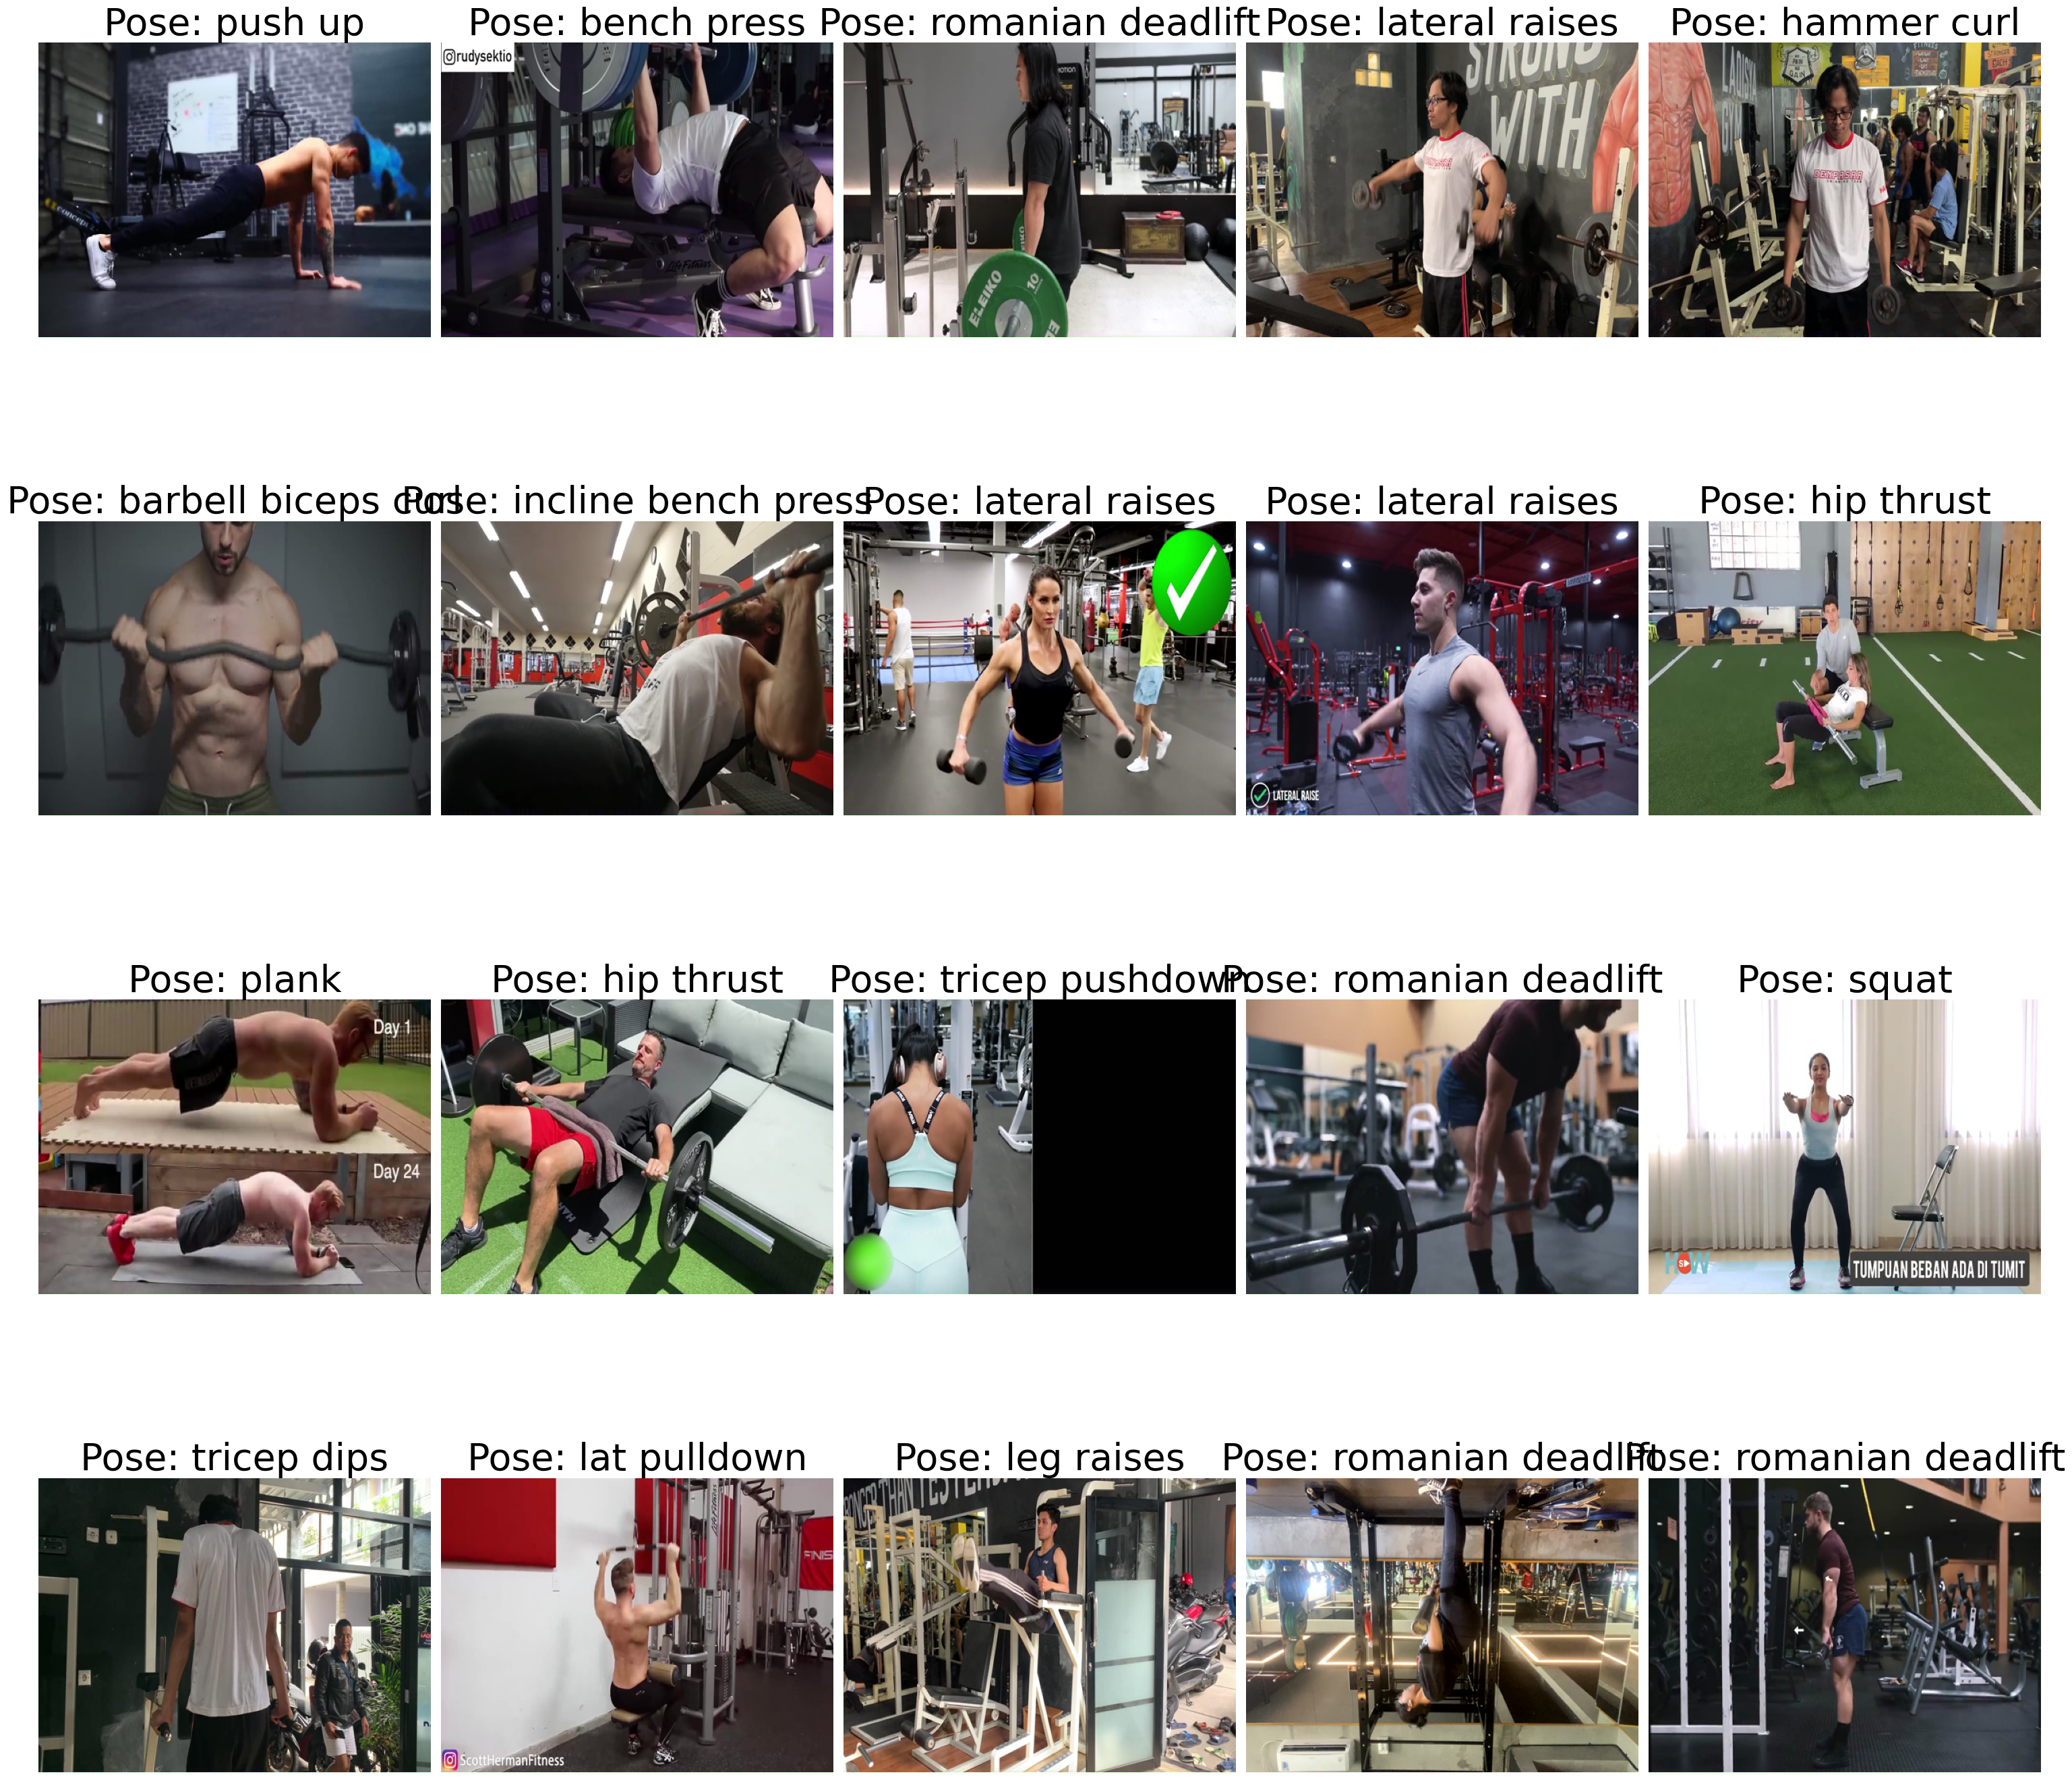

In [26]:
train_image_path_list = list(Path(config.TRAIN_DIR).glob("*/*.jpg"))
train_image_path_sample = random.sample(population=train_image_path_list, k=20)

def examine_images(images:list):
    num_images = len(images)
    num_rows = int(math.ceil(num_images/5))
    num_cols = 5

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 30),tight_layout=True)
    axs = axs.ravel()

    for i, image_path in enumerate(images[:num_images]):
        image = Image.open(image_path)
        label = PurePath(image_path).parent.name
        axs[i].imshow(image)
        axs[i].set_title(f"Pose: {label}", fontsize=40)
        axs[i].axis('off')
    plt.show()

examine_images(train_image_path_sample)

**Distribution of the images:**

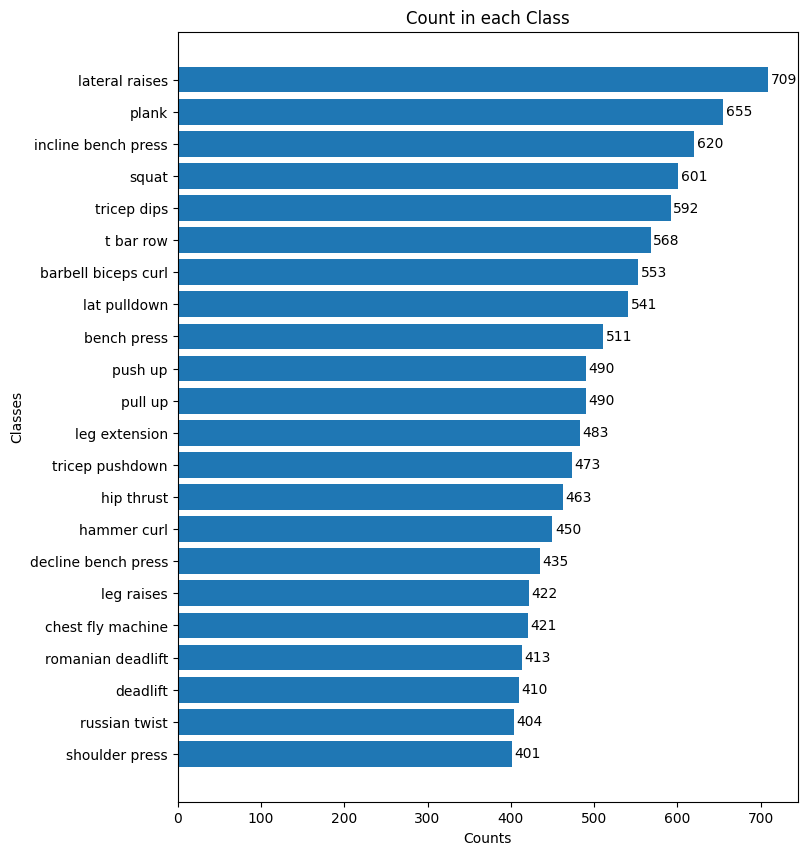

In [28]:
import matplotlib.pyplot as plt
from pathlib import Path

path = Path(config.TRAIN_DIR)


subdirs = [d for d in path.iterdir() if d.is_dir()]


image_count = {}


for subdir in subdirs:
    subdir_images = [img for img in subdir.glob("*.jpg")]
    image_count[subdir.name] = len(subdir_images)


sorted_subdirs = sorted(subdirs, key=lambda d: image_count[d.name])


plt.figure(figsize=(8, 10))
plt.barh(range(len(sorted_subdirs)), [image_count[d.name] for d in sorted_subdirs])
plt.yticks(range(len(sorted_subdirs)), [d.name for d in sorted_subdirs])


for i, count in enumerate([image_count[d.name] for d in sorted_subdirs]):
    plt.text(count + 3, i, str(count), va='center')


plt.title("Count in each Class")
plt.xlabel("Counts")
plt.ylabel("Classes")


plt.show()


In [46]:
'''
resize = transforms.Resize(size=(config.INPUT_HEIGHT,config.INPUT_WIDTH))
make_tensor = transforms.ToTensor()
normalize = transforms.Normalize(mean=config.IMAGENET_MEAN, std=config.IMAGENET_STD)
center_cropper = transforms.CenterCrop((config.INPUT_HEIGHT,config.INPUT_WIDTH))
random_horizontal_flip = transforms.RandomHorizontalFlip(p=0.5)
random_vertical_flip = transforms.RandomVerticalFlip(p=0.5)
random_rotation = transforms.RandomRotation(degrees=180)
random_crop = transforms.RandomCrop(size=(config.INPUT_HEIGHT,config.INPUT_WIDTH))
random_erasing = transforms.RandomErasing()
'''

#transforms.Normalize(mean=config.IMAGENET_MEAN, std=config.IMAGENET_STD)
#
#transforms.RandomVerticalFlip(p=0.4),

train_transforms = transforms.Compose([
  transforms.Resize(size=(config.INPUT_HEIGHT,config.INPUT_WIDTH)),
  transforms.CenterCrop((config.INPUT_HEIGHT,config.INPUT_WIDTH)),
  transforms.RandomCrop(size=(config.INPUT_HEIGHT,config.INPUT_WIDTH)),
  transforms.RandomHorizontalFlip(p=0.4),
  transforms.RandomRotation(degrees=45),
  transforms.ToTensor()
])

val_transforms = transforms.Compose([
    transforms.Resize(size=(config.INPUT_HEIGHT,config.INPUT_WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize(mean=config.IMAGENET_MEAN, std=config.IMAGENET_STD)
])

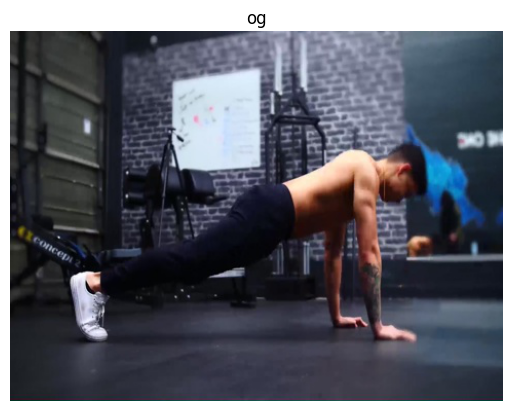

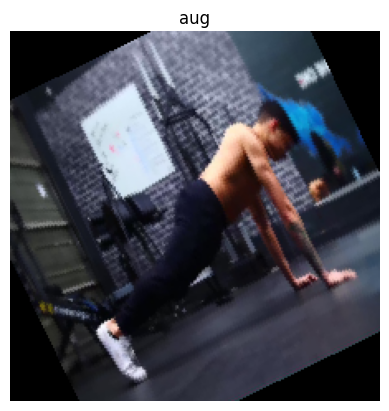

In [48]:
img = Image.open(train_image_path_sample[0])

plt.imshow(img)
plt.axis("off")
plt.title("og")
plt.show()

img_tensor = train_transforms(img)
img_tensor = img_tensor.numpy().transpose((1, 2, 0))
img_tensor = np.clip(img_tensor, 0, 1)

plt.imshow(img_tensor)
plt.axis("off")
plt.title("aug")
plt.show()